In [1]:
import mlgrad.funcs as funcs
import mlgrad.cls.cls_pca as cls_pca

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
X, Y = load_iris(return_X_y=True)
X2 = X[Y != 0]
Y2 = Y[Y != 0]

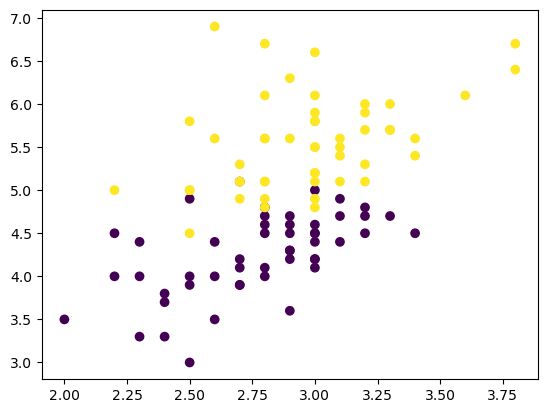

In [3]:
plt.scatter(X2[:,1], X2[:,2], c=Y2)
plt.show()

In [4]:
alg = cls_pca.CLS_PCA(funcs.Hinge(0.0))

In [5]:
alg.fit(X2, Y2, n_pc=2)

[[-0.638  0.979 -0.015 -0.197  0.046]
 [-0.491  0.298  0.165 -0.435  0.833]] [-0.741 -0.721 -0.112]
1 [[-11.447  -0.192  -0.383  -0.900  -0.084]
 [ -2.170  -0.177  -0.362  -0.915  -0.016]] [14.259 -0.721 -0.112]
1 [[-11.447  -0.192  -0.383  -0.900  -0.084]
 [ -2.170  -0.177  -0.362  -0.915  -0.016]] [14.259 -0.721 -0.112]


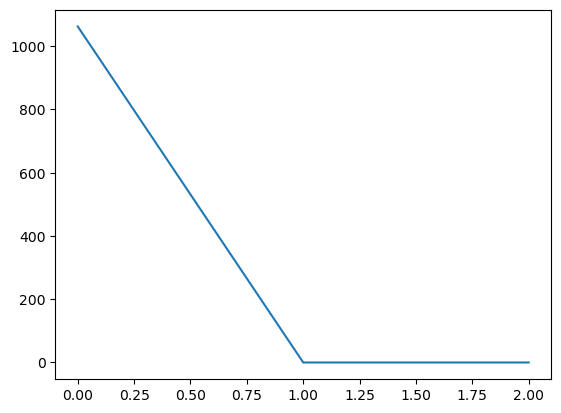

In [6]:
plt.plot(alg.qvals)
plt.show()

In [7]:
U = X2 @ alg.A[:,1:].T

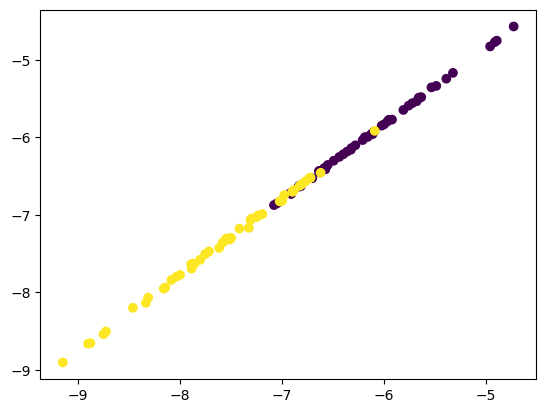

In [8]:
plt.scatter(U[:,0], U[:,1], c=Y2)
plt.show()

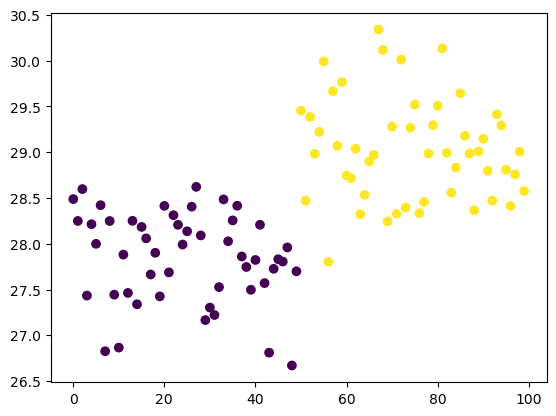

In [9]:
plt.scatter(range(len(X2)), alg.evaluate(X2), c=Y2)
plt.show()